# Discussion / Conclusion 

### Discussion
The research introduces a novel multi-phase deep learning ML model for optimized prediction of large-scale spatial SWE values across the western US, using the Colorado Rockies as a demonstration for the tutorial. 
Through a coupling of two popular ML algorithms, LightGBM and MLP regression, the model produces increased efficiencies through feature space optimization and produces more accurate predictions than with either algorithm alone. 
Built on open-source software and requiring only publicly available input variables of topographic data and past observations, the model effectively realizes 1-km gridded SWE with low RMSE and high R<sup>2</sup> values for approximately 20,000 km<sup>2</sup> of the western U.S. 
Though limited by the spatial domain and training data record in its current phase, we see the framework serving as a foundation for novel Hydro-ML SWE estimation up to the CONUS scale. 

<img align = 'right' src="./Images/Hydrocycle.jpg" alt = 'image' width = '300'/>

Is ML the right tool for the research?
The model results look very promising for extrapolating 1-km grid SWE based using terrain features and temporally continuous in situ observation locations (i.e., SNOTEL). 
When we have the previous week's observation/prediction for the grid site, the model performs exceptionally well.
This would be the case for predicting SWE in an operational setting, where we would have continuous predictions from the beginning of the water year (e.g., October 1st).

While we feel there is a need for model improvements with respect to examining additional features known to influence SWE (e.g., solar radiation, wind, vegetation, etc.), this relatively simple model performs exceptionally well.
Future work will investigate the use of these additional features and evaluate model accuracy vs. complexity gains. 
Some of this work will look to incorporate physics guided ML, where we aim to prevent impossible results (e.g., negative SWE values) and snow where there should not be (we observe very low elevation SWE values in the Sierra Nevada foothills). 
Integrating new features such as MODIS SCA could potentially address this particular limitation. 

The inclusion of near-real-time SWE estimates established from the model process into hydrological forecasting models may lead to more efficient water resources management and improvements in the understanding of snow-fed catchment dynamics.
At this phase, we feel the model is in an operational prototype state and is fit for coupling with large-scale hydrological models (e.g., the National Water Model (NWM)) to effectively "update the snow state." 
Here, we aim to advance the snow component in the hydrological cycle to improve season-to-season water supply predictions.
The current model version supports the realization of near-real-time SWE predictions across the domain, leveraging the most recent available data.

<img align = 'left' src="./Images/NWM.JPG" alt = 'drawing' width = '300'/>

Complementing model performance is model interpretability and corresponding data-driven products.
Future work will extend the spatial coverage and develop scaling methods to better support water resources management (e.g., HUC6, 8,10 watershed SWE), with a motivation to provide novel tools for quantifying the volume of water stored snow within mountainous supply catchments
As part of the ML workflow, this work targets a full-stack product by leveraging the [Tethys interface](https://tethys.byu.edu/apps/) and supporting a browser-based interactive use of the results and catchment SWE products.

The developers are collaborating in a multi-institution NOAA-funded snow modeling group to advance the state of operational snow science, where we will adapt the Snow-ML workflow into [Basic Model Interface](https://csdms.colorado.edu/wiki/BMI) for use in the [Next Generation](https://github.com/NOAA-OWP/ngen) NWM.
A key motivation is to seamlessly extend coverage  to all of the CONUS, and ultimately the entire US. 



### Final Thoughts
Developing the ML-based snow modeling workflow has produced many lessons learnt.
First, we demonstrate that AI/ML is capable of extrapolating SWE from point observations with high levels of accuracy for a relatively simple model.
We learnt that data processing is the most difficult and prohibitive step in model development, exemplified by the challenges of integrating more remote sensing data into our workflow.
Another key takeaway is the method for model evaluation. 
Model train/test partitioning can influence the model performance interpretation in multiple aspects.
Our objective was to examine the abililty of the the model to extrapolate point observations to a larger scale, and for this we used a 75/25% training/testing split.
The model demonstrated very high levels of accuracy, which could be attributed to the previous SWE values being known and the strong serial correlation over time.
Future work should hold out one year of observations and/or test on a new year to evaluate the capability of the model to predict seasonal SWE as would be required in an operational sense.
Related to model evaluation, we clearly see how the method of evalution influences the interpretation of model performance.
The KGE metric is useful for a time series of predictions but is not useful for single prediction.
Using mean absolute error (in) is useful for examining the overall magitude of error and likely the best metric for this case.
Using percentage error is similarily useful, however, it becomes strongly biased (as in poor model performance) when SWE values are small, and specifically, less than 1 inch. 


The Snow-ML model exceeded our expectations in regards to performance, with the prototype currently being evaluated for a production environment.
While not discussed in the tutorial, we developed an operational workflow for data acquisition of SNOTEL and other in situ observations, processing the data into the correct format, make the predictions, and saving predictions into the NetCDF4 format for integration with mapping interfaces.
For example, the [Interpretive Model Predictions](./Images/SWE_2023-02-04_Interactive.html) produced from the model support an interactive engagement with the snow-hydrological audience.
As seen below, we aim to produce snow state products from the model to support supply-oriented water resources management, where we can use catchment mean SWE to build maps rather than in situ observations.
The model will also form as the standard for which we guage our Snow-ML models, where we will benchmark the model performance at key water supply watersheds in the Colorado Rockies and Sierra Nevada ranges.

<img align = 'center' src="./Images/Snow_Ca.jpg" alt = 'image' width = '800'/>

Future modeling efforts will focus on improving the generalization of spatial and temporal extent.
This will largely focus on developing novel data processing workflows to address the significant quantity of training data that did not have a previous SWE value (most NASA ASO flights are bimonthly) and ensure observations are relatively equality distributed throughout the season. 
As seen in figure to the right, the majority of observations are centered around peak SWE in the later half of the snow season.
While more observations will still benefit the model, it limits the quantity of training data during the snow accumulation phase which is very important in "building the snowpack" within the model framework.
In the current state, the model should predict melt better than accumulation.
Mitigating the bias in training data could improve model performance when starting at the beginning of the water year.

<img align = 'center' src="./Images/WYWeek_hist.JPG" alt = 'image' width = '500'/>

Text(0.5, 1.0, 'Histogram of the Temporal Range of the Training Data')

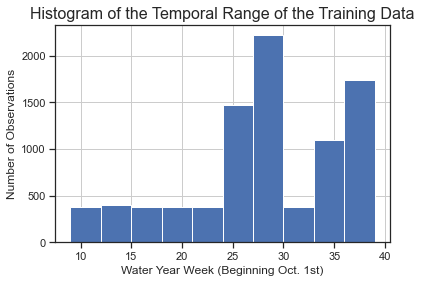

In [21]:
#Load packages
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt


#Load the predictions/observations for the testing dataframe
### Load H5 train files into dictionary
RegionTrain= {}
for region in Region_list:
    RegionTrain[region] = pd.read_hdf('Provided_Data/Final_Training_DF.h5', region)

RegionTrain['N_Co_Rockies'].hist(column = 'WYWeek')
plt.ylabel('Number of Observations')
plt.xlabel('Water Year Week (Beginning Oct. 1st)')
plt.title('Histogram of the Temporal Range of the Training Data', fontsize = 16)